In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

# Importing Data

In [2]:
df = pd.read_csv('C:\\Users\\elija\\Downloads\\HEAR_Original.csv', sep=',')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# Getting information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Checking if there is any null values 

# Turns out data does not have any null or missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
# unique values of each descriptive feature
df.apply(lambda col: col.unique())

Age               [40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...
Sex                                                          [M, F]
ChestPainType                                   [ATA, NAP, ASY, TA]
RestingBP         [140, 160, 130, 138, 150, 120, 110, 136, 115, ...
Cholesterol       [289, 180, 283, 214, 195, 339, 237, 208, 207, ...
FastingBS                                                    [0, 1]
RestingECG                                        [Normal, ST, LVH]
MaxHR             [172, 156, 98, 108, 122, 170, 142, 130, 120, 9...
ExerciseAngina                                               [N, Y]
Oldpeak           [0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, ...
ST_Slope                                           [Up, Flat, Down]
HeartDisease                                                 [0, 1]
dtype: object

In [6]:
# Importing features
features = pd.read_csv('C:\\Users\\elija\\Downloads\\HEAR_Features.csv',index_col ='Feature Name')
features

,Description,Data Type,Scale,Domain,Missing Values
Feature Name,,,,,
Age,age of the patient,integer,ratio,"[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...",0
Sex,sex of the patient,string,nominal,"[M, F]",0
ChestPainType,chest pain type,string,nominal,"[ATA, NAP, ASY, TA]",0
RestingBP,resting blood pressure,integer,ratio,"[140, 160, 130, 138, 150, 120, 110, 136, 115, ...",0
Cholesterol,serum cholesterol,integer,ratio,"[289, 180, 283, 214, 195, 339, 237, 208, 207, ...",0
FastingBS,fasting blood sugar,integer,nominal,"[0, 1]",0
RestingECG,resting electrocardiogram results,string,nominal,"[Normal, ST, LVH]",0
MaxHR,maximum heart rate achieved,integer,ratio,"[172, 156, 98, 108, 122, 170, 142, 130, 120, ...",0
ExerciseAngina,exercise-induced angina,string,nominal,"[N, Y]",0


In [7]:
# Data quality report for categorical features
# Building the data quality reports

continuous = pd.DataFrame(columns=['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Min.', 'Q1', 'Median', 'Q3', 'Max.', 'Mean', 'Std. Dev.'])
categorical = pd.DataFrame(columns=['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])

for f in features.index:
    if features['Scale'][f] == 'ratio':
       # col = features['Feature Name']
        continuous.loc[len(continuous)] = [f, features['Description'][f], df[f].count(), (df[f].isnull().sum()*100)/df[f].count(), df[f].nunique(), min(df[f]), round(df[f].describe()['25%'], 2),
                                          df[f].describe()['50%'], df[f].describe()['75%'], max(df[f]), round(df[f].describe()['mean'], 2), round(df[f].describe()['std'], 2)]
    else:
        #col = features['Feature Name'][f]
        categorical.loc[len(categorical)] = [f, features['Description'][f], df[f].count(), (df[f].isnull().sum()*100)/df[f].count(), df[f].nunique(), df[f].value_counts().index[0], 
                                             df[f].value_counts()[0], (df[f].value_counts()[0] * 100) / df[f].count(), df[f].value_counts().index[1], df[f].value_counts()[1], 
                                             (df[f].value_counts()[1] * 100) / df[f].count()]
        
continuous = continuous.set_index('Feature')
categorical = categorical.set_index('Feature')

In [8]:
continuous

,Desc.,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
Feature,,,,,,,,,,,
Age,age of the patient,918,0.0,50,28,47.00,54.0,60.0,77,53.51,9.43
RestingBP,resting blood pressure,918,0.0,67,0,120.00,130.0,140.0,200,132.40,18.51
Cholesterol,serum cholesterol,918,0.0,222,0,173.25,223.0,267.0,603,198.80,109.38
MaxHR,maximum heart rate achieved,918,0.0,119,60,120.00,138.0,156.0,202,136.81,25.46
Oldpeak,oldpeak,918,0.0,53,-2.6,0.00,0.6,1.5,6.2,0.89,1.07


In [9]:
categorical

,Desc.,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
Feature,,,,,,,,,,
Sex,sex of the patient,918,0.0,2,M,725,78.976035,F,193,21.023965
ChestPainType,chest pain type,918,0.0,4,ASY,496,54.030501,NAP,203,22.113290
FastingBS,fasting blood sugar,918,0.0,2,0,704,76.688453,1,214,23.311547
RestingECG,resting electrocardiogram results,918,0.0,3,Normal,552,60.130719,LVH,188,20.479303
ExerciseAngina,exercise-induced angina,918,0.0,2,N,547,59.586057,Y,371,40.413943
ST_Slope,the slope of the peak exercise ST segment,918,0.0,3,Flat,460,50.108932,Up,395,43.028322
HeartDisease,output class,918,0.0,2,1,410,44.662309,0,508,55.337691


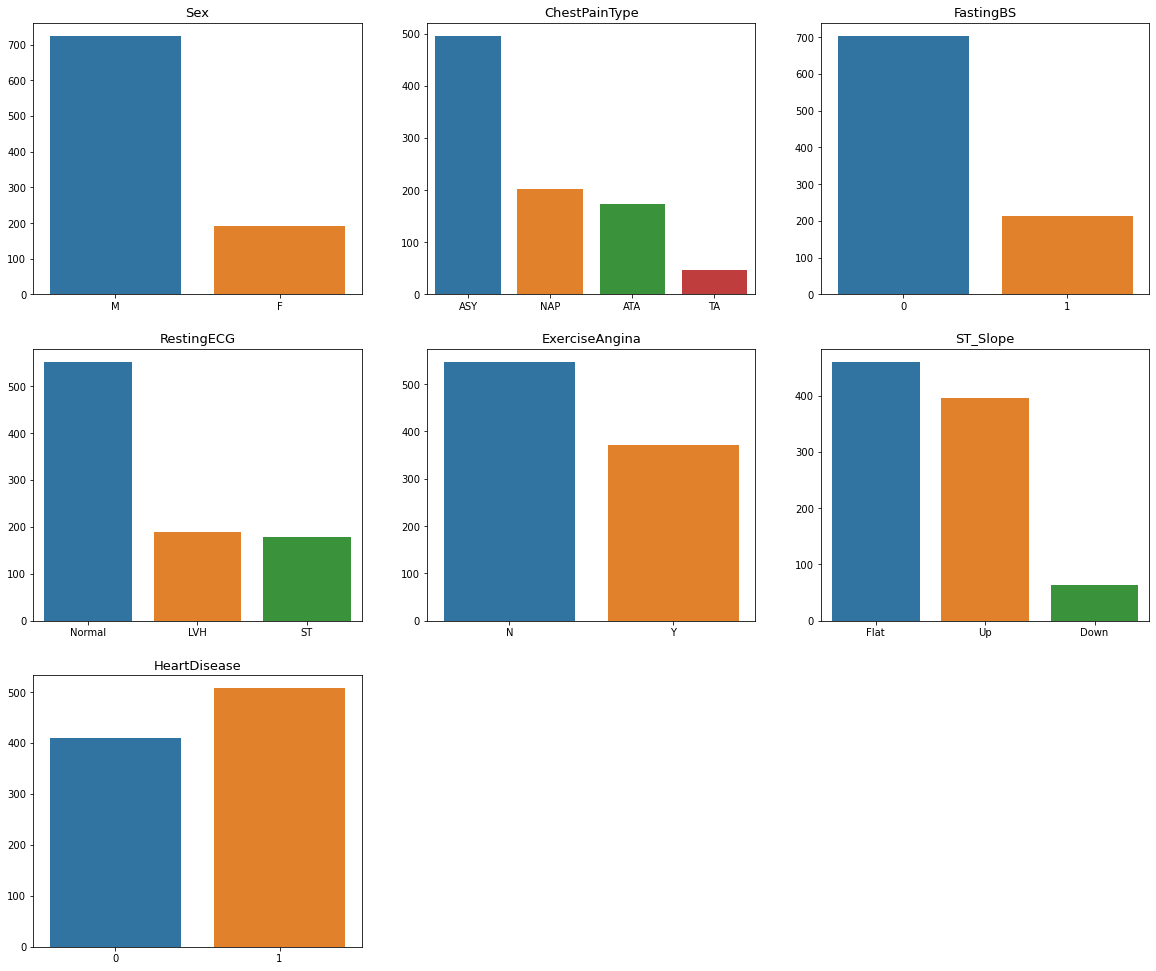

In [10]:
#categorical bar plot visualization
categ = categorical.index

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,17))
#delete empty subplots
fig.delaxes(axes[2,2])
fig.delaxes(axes[2,1])
#separate the subplots
a = [ax for ax in axes.flat]

#plot each one
for i in range(len(categ)):
    sns.barplot(x=df[categ[i]].value_counts().index, y=df[categ[i]].value_counts().values, ax=a[i])
    a[i].set_title(categ[i], fontsize = 13)

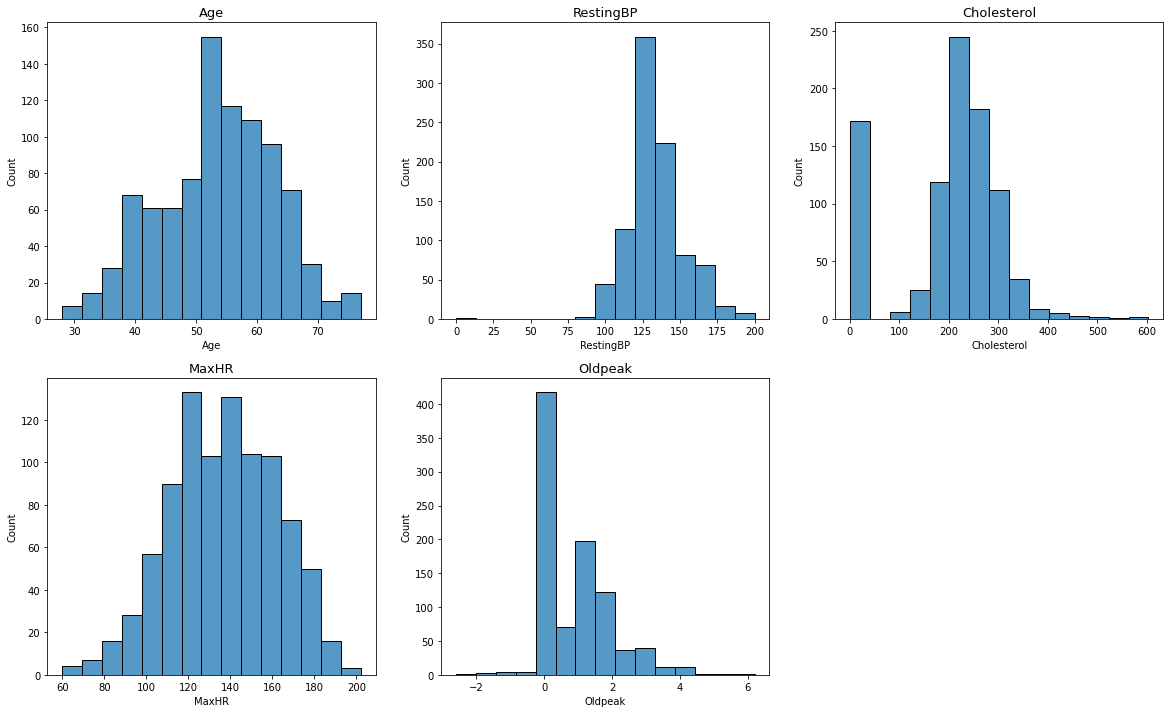

In [11]:
#continuous histogram visualization
contin = continuous.index

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,12))
fig.delaxes(axes[1,2])  #delete the empty 6th subplot
a = [ax for ax in axes.flat] #separate the subplots

#plot each one
for i in range(len(contin)):
    sns.histplot(data=df[contin], x=contin[i], ax=a[i], bins=15)
    a[i].set_title(contin[i], fontsize = 13)

# age - normally distrubuted with a peak around 51 to 55
# resting bp has an outlier at 0 and right skewed with a peak around 125

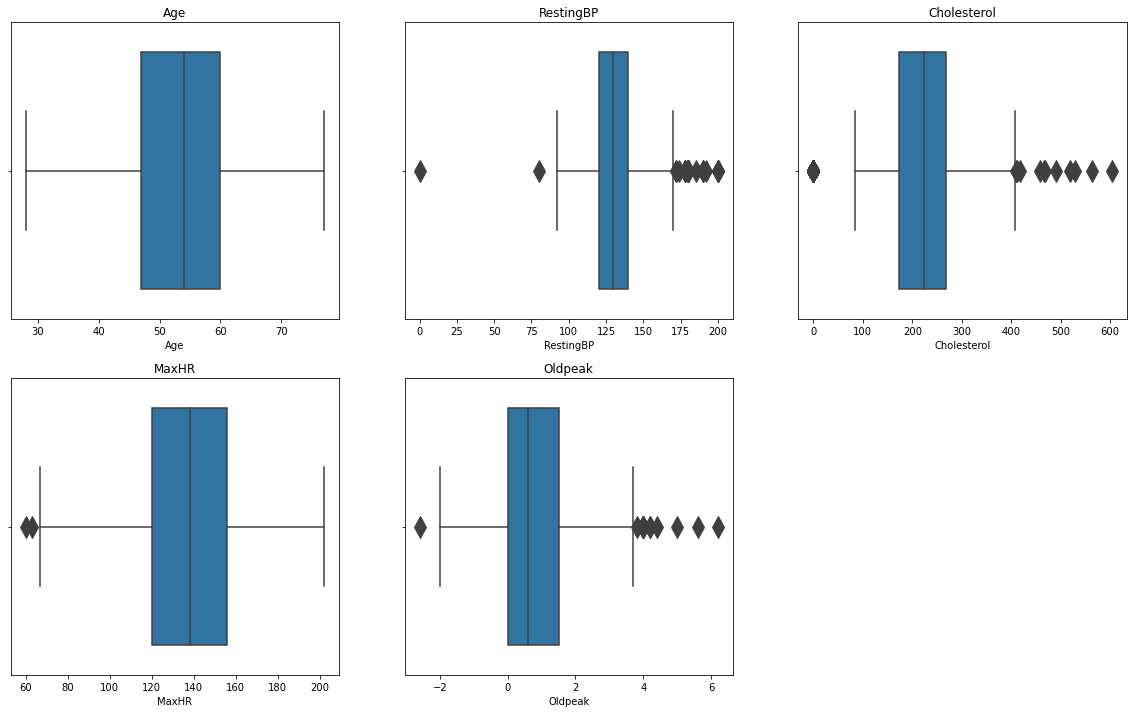

In [12]:
# Continuous boxplot visualization
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,12))
fig.delaxes(axes[1,2])  #delete the empty 6th subplot
a = [ax for ax in axes.flat] #separate the subplots

# plot each one
for i in range(len(contin)):
    sns.boxplot(data=df[contin], x=contin[i], fliersize=15, ax=a[i])
    a[i].set_title(contin[i], fontsize = 12)


# age - normally distrubuted with a peak around 51 to 55
# resting bp has an outlier at 0 and right skewed with a peak around 125

In [13]:
# Removing outliers by clamping method
df_removedOutliers = df.copy()
for feature in continuous.index:
    q1 = continuous.loc[feature, 'Q1']
    q3 = continuous.loc[feature, 'Q3']
    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    
    for l in df_removedOutliers[df_removedOutliers[feature] < lower].index:
        df_removedOutliers.loc[l, feature] = lower 
    
    for u in df_removedOutliers[df_removedOutliers[feature] > upper].index:
        df_removedOutliers.loc[u, feature] = upper 

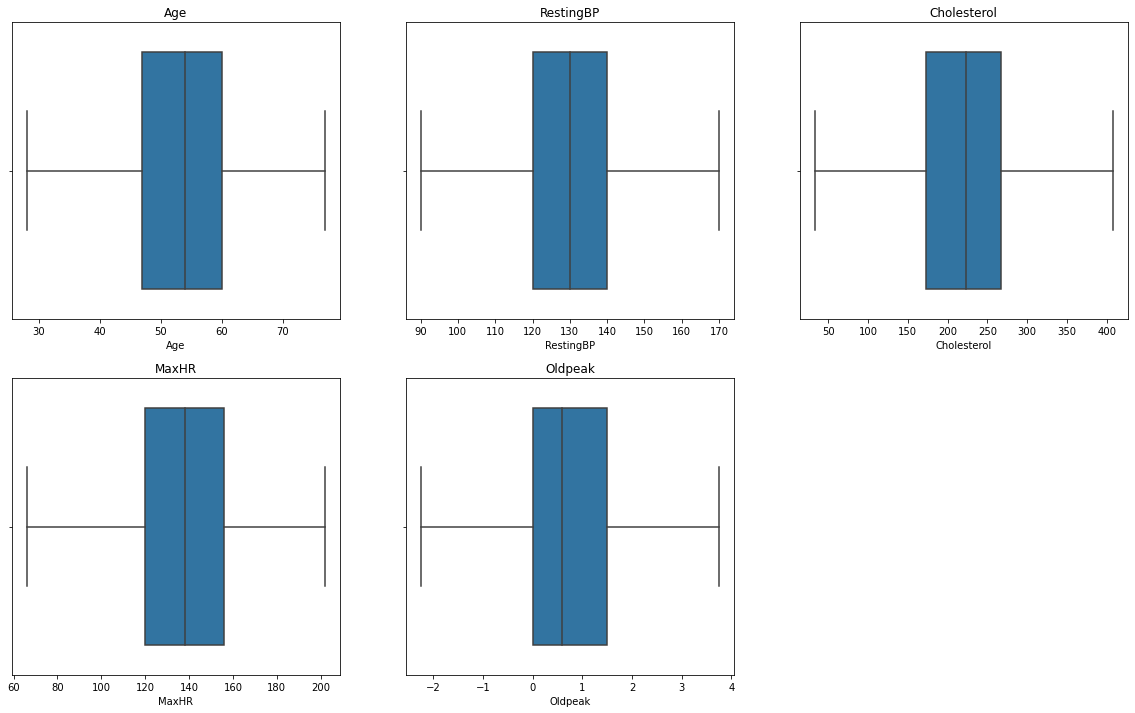

In [14]:
# Box plots after clamping outliers
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,12))
fig.delaxes(axes[1,2])  #delete the empty 6th subplot
a = [ax for ax in axes.flat] #separate the subplots

# plot each one
for i in range(len(contin)):
    sns.boxplot(data=df_removedOutliers[contin], x=contin[i], fliersize=15, ax=a[i])
    a[i].set_title(contin[i], fontsize = 12)

Text(0.5, 0.98, 'Range (0-1) Normalizing')

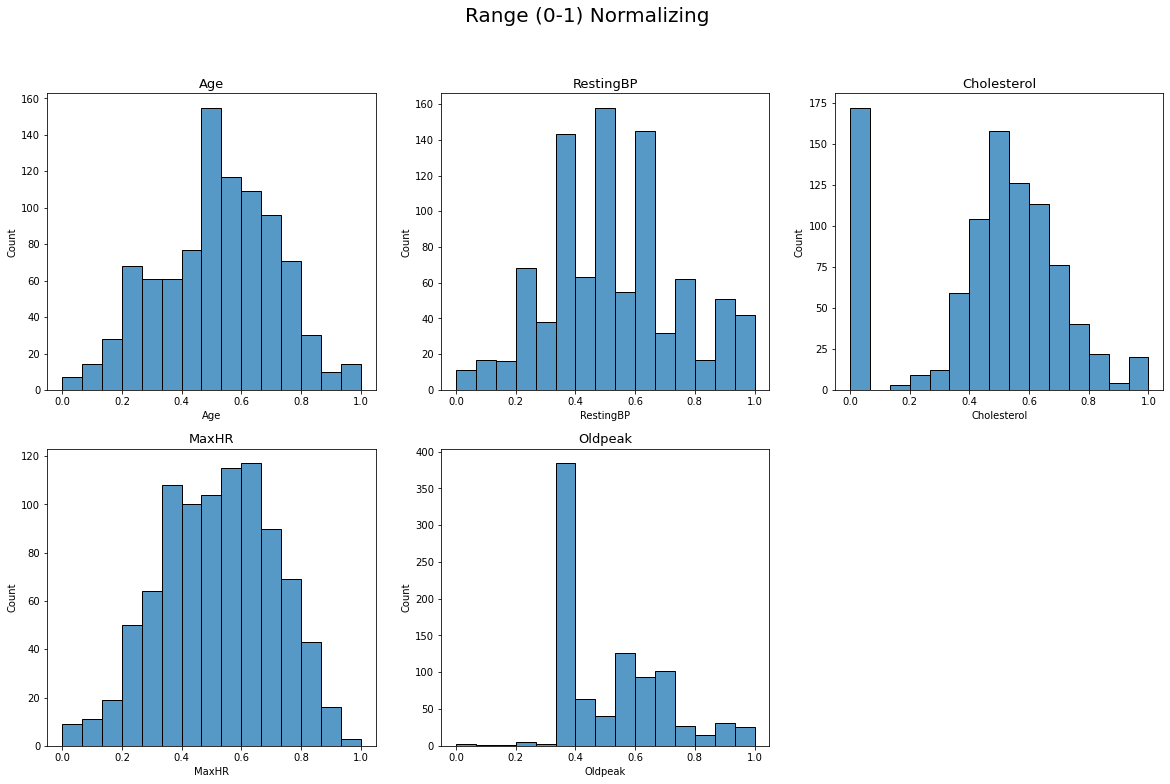

In [15]:
# Range normalization for continuous data features
low = 0
high = 1

df_range = df_removedOutliers.copy()

for feature in continuous.index:
    maxC = max(df_range[feature])
    minC = min(df_range[feature])

    for i in range(df_range.loc[:,feature].size):
        df_range.loc[i, feature] = (((df_range.loc[i, feature]-minC)/(maxC-minC))*(high-low))+low

#continuous histogram visualization
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,12))
fig.delaxes(axes[1,2])  #delete the empty 6th subplot
a = [ax for ax in axes.flat] #separate the subplot index

#plot each one
for i in range(len(contin)):
    sns.histplot(data=df_range[contin], x=contin[i], ax=a[i], bins=15)
    a[i].set_title(contin[i], fontsize = 13)

fig.suptitle("Range (0-1) Normalizing", fontsize=20)

In [16]:
# Showcasing new normalized dataframe.
df_range

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.625,0.683667,0,Normal,0.779412,N,0.375000,Up,0
1,0.428571,F,NAP,0.875,0.393000,0,Normal,0.661765,N,0.541667,Flat,1
2,0.183673,M,ATA,0.500,0.667667,0,ST,0.235294,N,0.375000,Up,0
3,0.408163,F,ASY,0.600,0.483667,0,Normal,0.308824,Y,0.625000,Flat,1
4,0.530612,M,NAP,0.750,0.433000,0,Normal,0.411765,N,0.375000,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,M,TA,0.250,0.617000,0,Normal,0.485294,N,0.575000,Flat,1
914,0.816327,M,ASY,0.675,0.427667,1,Normal,0.551471,N,0.941667,Flat,1
915,0.591837,M,ASY,0.500,0.262333,0,Normal,0.360294,Y,0.575000,Flat,1
916,0.591837,F,ATA,0.500,0.542333,0,LVH,0.794118,N,0.375000,Flat,1


In [17]:
# one hot encoding for categorical features
hot_encoded_df = pd.get_dummies(data= df_range, columns=['Sex', 'ChestPainType','ExerciseAngina','RestingECG','ST_Slope'])
hot_encoded_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.625,0.683667,0,0.779412,0.375000,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,0.428571,0.875,0.393000,0,0.661765,0.541667,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
2,0.183673,0.500,0.667667,0,0.235294,0.375000,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,0.408163,0.600,0.483667,0,0.308824,0.625000,1,1,0,1,...,0,0,0,1,0,1,0,0,1,0
4,0.530612,0.750,0.433000,0,0.411765,0.375000,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.250,0.617000,0,0.485294,0.575000,1,0,1,0,...,0,1,1,0,0,1,0,0,1,0
914,0.816327,0.675,0.427667,1,0.551471,0.941667,1,0,1,1,...,0,0,1,0,0,1,0,0,1,0
915,0.591837,0.500,0.262333,0,0.360294,0.575000,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
916,0.591837,0.500,0.542333,0,0.794118,0.375000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [18]:
hot_encoded = hot_encoded_df.drop(['HeartDisease'], axis = 1)
hot_encoded.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.625,0.683667,0,0.779412,0.375000,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,0.428571,0.875,0.393000,0,0.661765,0.541667,1,0,0,0,1,0,1,0,0,1,0,0,1,0
2,0.183673,0.500,0.667667,0,0.235294,0.375000,0,1,0,1,0,0,1,0,0,0,1,0,0,1


In [19]:
X = hot_encoded
y = hot_encoded_df['HeartDisease']

In [20]:
# Splitting data for training purposes
from sklearn.model_selection import train_test_split
# splitting into train, validation and test
x_main,x_test,y_main,y_test = train_test_split(X,y,test_size=0.33)

X_train, X_test, y_train, y_test = train_test_split(x_main, y_main, test_size = 0.33)


In [21]:
# Importing mutual_info_classif for estimating mutual information for a discrete target variable

from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ChestPainType_ASY    0.179115
ST_Slope_Up          0.164553
ST_Slope_Flat        0.143092
ExerciseAngina_N     0.122561
ExerciseAngina_Y     0.108402
MaxHR                0.103252
Oldpeak              0.089344
ChestPainType_ATA    0.064191
Sex_M                0.062267
Cholesterol          0.061200
Sex_F                0.056900
Age                  0.034036
FastingBS            0.028937
RestingECG_Normal    0.026404
RestingBP            0.014978
RestingECG_ST        0.001992
RestingECG_LVH       0.001340
ChestPainType_TA     0.000728
ST_Slope_Down        0.000000
ChestPainType_NAP    0.000000
dtype: float64

<AxesSubplot:>

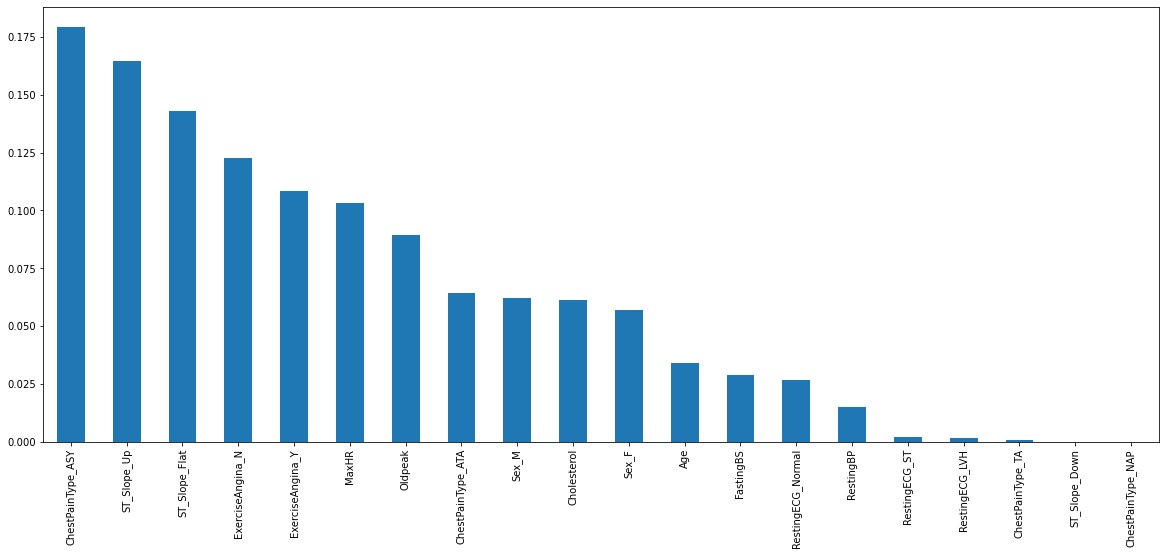

In [22]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20,8))

In [23]:
X = hot_encoded
y = hot_encoded_df['HeartDisease']

In [24]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

ST_Slope_Up          0.173519
ChestPainType_ASY    0.155571
ExerciseAngina_N     0.139517
ST_Slope_Flat        0.138545
ExerciseAngina_Y     0.110345
Oldpeak              0.096072
ChestPainType_ATA    0.094415
MaxHR                0.083867
Cholesterol          0.077612
Sex_F                0.073280
Sex_M                0.063182
FastingBS            0.046248
ST_Slope_Down        0.045476
RestingBP            0.034560
RestingECG_LVH       0.026880
RestingECG_ST        0.023418
RestingECG_Normal    0.021724
Age                  0.019991
ChestPainType_NAP    0.009439
ChestPainType_TA     0.000000
dtype: float64

In [25]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe= RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
rfe.fit(x_main,y_main)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)

<AxesSubplot:>

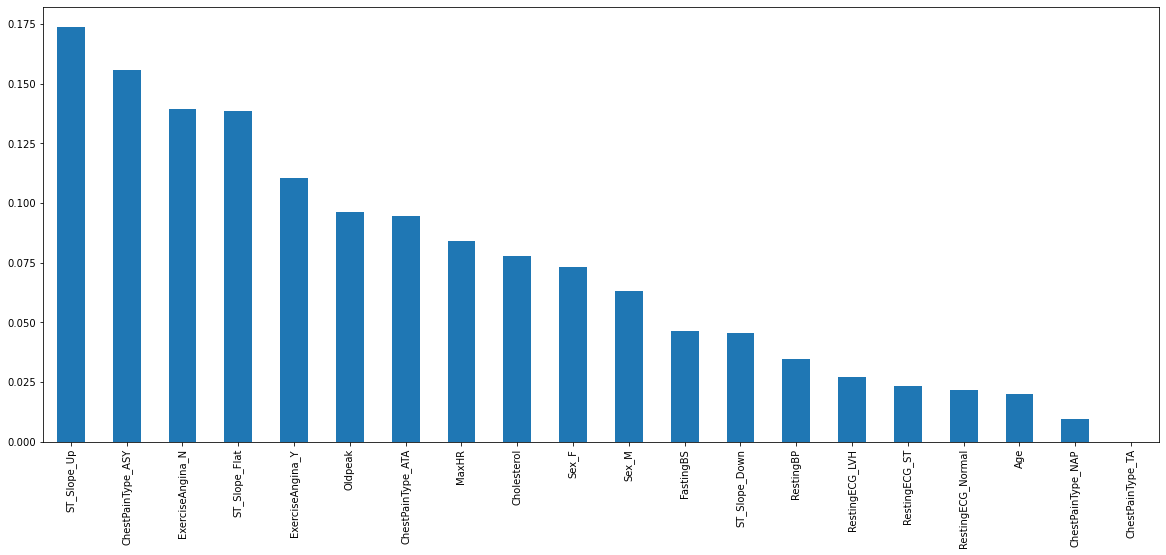

In [26]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20,8))

In [27]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
RestingBP selected=True rank=1
Cholesterol selected=True rank=1
FastingBS selected=False rank=11
MaxHR selected=True rank=1
Oldpeak selected=True rank=1
Sex_F selected=True rank=1
Sex_M selected=False rank=10
ChestPainType_ASY selected=True rank=1
ChestPainType_ATA selected=False rank=6
ChestPainType_NAP selected=False rank=7
ChestPainType_TA selected=False rank=8
ExerciseAngina_N selected=False rank=4
ExerciseAngina_Y selected=False rank=9
RestingECG_LVH selected=False rank=3
RestingECG_Normal selected=False rank=2
RestingECG_ST selected=False rank=13
ST_Slope_Down selected=False rank=12
ST_Slope_Flat selected=False rank=5
ST_Slope_Up selected=True rank=1


In [28]:
ML_df = hot_encoded[['ST_Slope_Up','ChestPainType_ASY','Oldpeak','MaxHR','Sex_M','Cholesterol','Age']]

In [29]:
ML_df

,ST_Slope_Up,ChestPainType_ASY,Oldpeak,MaxHR,Sex_M,Cholesterol,Age
0,1,0,0.375000,0.779412,1,0.683667,0.244898
1,0,0,0.541667,0.661765,0,0.393000,0.428571
2,1,0,0.375000,0.235294,1,0.667667,0.183673
3,0,1,0.625000,0.308824,0,0.483667,0.408163
4,1,0,0.375000,0.411765,1,0.433000,0.530612
...,...,...,...,...,...,...,...
913,0,0,0.575000,0.485294,1,0.617000,0.346939
914,0,1,0.941667,0.551471,1,0.427667,0.816327
915,0,1,0.575000,0.360294,1,0.262333,0.591837
916,0,0,0.375000,0.794118,0,0.542333,0.591837


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(ML_df, hot_encoded_df['HeartDisease'],  
                                                    test_size=0.33, random_state=0)

In [33]:
from sklearn.tree import DecisionTreeClassifier
# create a classifier instance
dt_clf = DecisionTreeClassifier(max_depth = 5, criterion='entropy', random_state = 50)

# fit the model
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=50)

In [34]:
# predict
y_pred = dt_clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,

# In this section, Various models & Classifiers were applied to our data.

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.8085808580858086

In [36]:
from sklearn.metrics import confusion_matrix
conf_m_DT = confusion_matrix(Y_test, y_pred)
conf_m_DT = pd.DataFrame(conf_m_DT)
print("Confusion Matrix")
conf_m_DT

Confusion Matrix


,0,1
0,98,30
1,28,147


In [37]:
#additional evalutation metrics:
TP, FN, FP, TN = conf_m_DT.loc[0,0], conf_m_DT.loc[0,1], conf_m_DT.loc[1,0], conf_m_DT.loc[1,1]

#Bias Score
bias = (TP + FP)/(TP + FN)
print("Bias Score:", bias)

#FAR Score
far = (FP) / (TP + FP)
print("FAR Score:", far)

#CSI Score
csi = (TP) / (TP + FN + FP)
print("CSI Score:", csi)

#TSS Score:
tss = ((TP) / (TP + FN)) - ((FP) / (FP + TN))
print("TSS Score:", tss)

Bias Score: 0.984375
FAR Score: 0.2222222222222222
CSI Score: 0.6282051282051282
TSS Score: 0.605625


In [38]:
from sklearn.model_selection import GridSearchCV
 
def main() :
    X = ML_df
    Y = hot_encoded_df['HeartDisease']
     
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )
     
    # Model training    
    max_accuracy = 0
     
    # grid searching for learning rate    
    parameters = { "max_depth": [3, 4, 5, 6],
              "max_features": [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ],
              "min_samples_leaf": [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ],
              "criterion": ["gini", "entropy"]}
         
    model = DecisionTreeClassifier()        
    grid = GridSearchCV( model, parameters )    
    grid.fit( X_train, Y_train )
         
    # Prediction on test set
    Y_pred = grid.predict( X_test )
       
    # measure performance    
    correctly_classified = 0
     
    # counter    
    count = 0
    Y_test = Y_test.reset_index(drop = True)
    
    for count in range( np.size( Y_pred ) ) :            
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1  
                 
    accuracy = ( correctly_classified / count ) * 100
    
    print("Tuned Decision Tree Parameters: {}".format(grid.best_params_))
    print( "Maximum accuracy achieved by sklearn model through grid searching : ", np.round( accuracy, 2 ) )
     
if __name__ == "__main__" :    
    main()

C:\Users\elija\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\elija\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\elija\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\elija\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\elija\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 10}
Maximum accuracy achieved by sklearn model through grid searching :  82.62


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 7}
Maximum accuracy achieved by sklearn model through grid searching :  82.95

In [39]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


nn_clf = KNeighborsClassifier(n_neighbors=1)
nn_clf.fit(X_train, Y_train)

y_pred = nn_clf.predict(X_test)
print('1NN accuracy score {:.3f}'.format(accuracy_score(y_pred, Y_test)))

1NN accuracy score 0.795


[Text(0.5, 0, 'k'), Text(0, 0.5, 'Accuracy')]

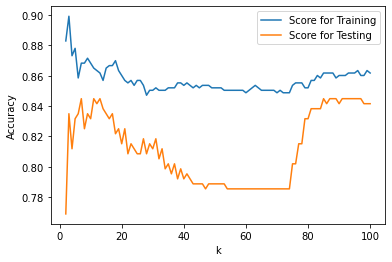

In [40]:
# obtaining the optimal k
resultsKNN = pd.DataFrame(columns=['KNN', 'Score for Training', 'Score for Testing'])

for knnCount in range (2,101):
    knn = KNeighborsClassifier(n_neighbors=knnCount)
    knn.fit(X_train, Y_train)
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    scoreTrain = accuracy_score(Y_train, y_train_pred)
    scoreTest = accuracy_score(Y_test, y_pred)

    resultsKNN.loc[knnCount] = [knnCount, scoreTrain, scoreTest]
    
resultsKNN.pop('KNN')
ax = resultsKNN.plot()
ax.set(xlabel='k', ylabel='Accuracy')

In [41]:
# KNN classifier with k = 2 neighbours is the best model, since accuracy decreases with higher k values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


nn_clf = KNeighborsClassifier(n_neighbors=15)
nn_clf.fit(X_train, Y_train)

y_pred = nn_clf.predict(X_test)
print('1NN accuracy score {:.3f}'.format(accuracy_score(y_pred, Y_test)))

1NN accuracy score 0.835


In [42]:
conf_m_KNN = confusion_matrix(Y_test, y_pred)
conf_m_KNN = pd.DataFrame(conf_m_KNN)
print("Confusion Matrix")
conf_m_KNN

Confusion Matrix


,0,1
0,101,27
1,23,152


In [43]:
#additional evalutation metrics:
TP, FN, FP, TN = conf_m_KNN.loc[0,0], conf_m_KNN.loc[0,1], conf_m_KNN.loc[1,0], conf_m_KNN.loc[1,1]

#Bias Score
bias = (TP + FP)/(TP + FN)
print("Bias Score:", bias)

#FAR Score
far = (FP) / (TP + FP)
print("FAR Score:", far)

#CSI Score
csi = (TP) / (TP + FN + FP)
print("CSI Score:", csi)

#TSS Score:
tss = ((TP) / (TP + FN)) - ((FP) / (FP + TN))
print("TSS Score:", tss)

Bias Score: 0.96875
FAR Score: 0.18548387096774194
CSI Score: 0.6688741721854304
TSS Score: 0.6576339285714285


In [44]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV
 
def main() :    

    X = ML_df
    Y = hot_encoded_df['HeartDisease']
    
    # Splitting dataset into train and test set
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )
     
    # Model training    
    max_accuracy = 0
     
    # grid searching for learning rate    
    parameters = {'n_neighbors': [13,14,15,91,92,93],
                 'p': [1,2,3,4]}
         
    model = KNeighborsClassifier()        
    grid = GridSearchCV( model, parameters )    
    grid.fit( X_train, Y_train )
         
    # Prediction on test set
    Y_pred = grid.predict( X_test )
       
    # measure performance    
    correctly_classified = 0
     
    # counter    
    count = 0
    Y_test = Y_test.reset_index(drop = True)
    
    for count in range( np.size( Y_pred ) ) :            
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1  
                 
    accuracy = ( correctly_classified / count ) * 100
     
    print("Tuned KNeighbors Classifier Parameters: {}".format(grid.best_params_))
    print( "Maximum accuracy achieved by sklearn model through grid searching : ", np.round( accuracy, 2 ) )
     
if __name__ == "__main__" :    
    main()

Tuned KNeighbors Classifier Parameters: {'n_neighbors': 91, 'p': 4}
Maximum accuracy achieved by sklearn model through grid searching :  84.26


In [45]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,Y_train)

y_pred = nbc.predict(X_test)
print("Gaussian NB Accuracy: {0:.2f}".format(accuracy_score(y_pred, Y_test)))

Gaussian NB Accuracy: 0.85


In [46]:
conf_m_G = confusion_matrix(Y_test, y_pred)
conf_m_G = pd.DataFrame(conf_m_G)
print("Confusion Matrix")
conf_m_G

Confusion Matrix


,0,1
0,106,22
1,22,153


In [47]:
#additional evalutation metrics:
TP, FN, FP, TN = conf_m_G.loc[0,0], conf_m_G.loc[0,1], conf_m_G.loc[1,0], conf_m_G.loc[1,1]

#Bias Score
bias = (TP + FP)/(TP + FN)
print("Bias Score:", bias)

#FAR Score
far = (FP) / (TP + FP)
print("FAR Score:", far)

#CSI Score
csi = (TP) / (TP + FN + FP)
print("CSI Score:", csi)

#TSS Score:
tss = ((TP) / (TP + FN)) - ((FP) / (FP + TN))
print("TSS Score:", tss)

Bias Score: 1.0
FAR Score: 0.171875
CSI Score: 0.7066666666666667
TSS Score: 0.7024107142857143


In [48]:
# Logistic Regression
from sklearn.linear_model import  LogisticRegression

# C = 1.0 by default
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

print("Log Reg Accuracy: {0:.2f}".format( accuracy_score(Y_test,y_pred) ))

Log Reg Accuracy: 0.83


In [49]:
conf_m_LR = confusion_matrix(Y_test, y_pred)
conf_m_LR = pd.DataFrame(conf_m_LR)
print("Confusion Matrix")
conf_m_LR

Confusion Matrix


,0,1
0,100,28
1,25,150


In [50]:
#additional evalutation metrics:
TP, FN, FP, TN = conf_m_LR.loc[0,0], conf_m_LR.loc[0,1], conf_m_LR.loc[1,0], conf_m_LR.loc[1,1]

#Bias Score
bias = (TP + FP)/(TP + FN)
print("Bias Score:", bias)

#FAR Score
far = (FP) / (TP + FP)
print("FAR Score:", far)

#CSI Score
csi = (TP) / (TP + FN + FP)
print("CSI Score:", csi)

#TSS Score:
tss = ((TP) / (TP + FN)) - ((FP) / (FP + TN))
print("TSS Score:", tss)

Bias Score: 0.9765625
FAR Score: 0.2
CSI Score: 0.6535947712418301
TSS Score: 0.6383928571428572


In [51]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV
 
def main() :    

    X = ML_df
    Y = hot_encoded_df['HeartDisease']
    
    # Splitting dataset into train, validation, and test set.
    
    x_main,x_test,y_main,y_test = train_test_split(X,Y,test_size=0.33)
    
    X_train, X_test, Y_train, Y_test = train_test_split(
      x_main, y_main, test_size = 0.33, random_state = 0 )
     
    # Model training    
    max_accuracy = 0
     
    # grid searching for learning rate    
    parameters = { 'C' : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ] }
         
    model = LogisticRegression()        
    grid = GridSearchCV( model, parameters )    
    grid.fit( X_train, Y_train )
         
    # Prediction on test set
    Y_pred = grid.predict( X_test )
       
    # measure performance    
    correctly_classified = 0
     
    # counter    
    count = 0
    Y_test = Y_test.reset_index(drop = True)
    
    for count in range( np.size( Y_pred ) ) :            
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1  
                 
    accuracy = ( correctly_classified / count ) * 100
     
    print("Tuned Logistic Regression Parameters: {}".format(grid.best_params_))
    print( "Maximum accuracy achieved by sklearn model through grid searching : ", np.round( accuracy, 2 ) )
     
if __name__ == "__main__" :    
    main()

Tuned Logistic Regression Parameters: {'C': 10}
Maximum accuracy achieved by sklearn model through grid searching :  87.62
